# Análise Dados - Projeto Palmeiras
## TCC 2 - Johnny Gomes Pereira

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix

# import sweetviz as sv

### Carregamento *dataframe* e leitura de metadados 

In [ ]:
data = pd.read_csv('07.final.csv')
data.sample(5)

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
# passar todas [pelo menos algumas] features para tipo 'CATEGORICO':
data.isolado_id = pd.Categorical(data.isolado_id)# exemplo 1
data.latitude   = pd.Categorical(data.latitude)#   exemplo 2
data.longitude  = pd.Categorical(data.longitude)#  exemplo 3

In [ ]:
type(data.isolado_id)

In [ ]:
data["ano"].value_counts()

In [ ]:
data["substrato"].value_counts()

In [ ]:
data["uf"].value_counts()

In [ ]:
data["equipe"].value_counts()

## Relatórios autogerados - Pandas Profilling:

In [ ]:
# Profilling sem quaisquer tratamentos no dataset:
report = ProfileReport(data, title='Profiling Report', correlations={"cramers": {"calculate": False}}, explorative=True)
report.to_widgets()

In [ ]:
report.to_notebook_iframe()
report.to_file("isolados_report.html")

### Visualisações Gerais - SweetViz:

In [ ]:
#analyzing the dataset
advert_report = sv.analyze(data)

In [ ]:
#display the report
advert_report.show_html('SweetViz-Report.html')

### Seaborn - Gráficos

## Feature Selection and Feature Engeneering - Reações

In [2]:
reacoes = pd.read_csv('04.reacoes-pivot.csv')
reacoes.sample(5)

,isolado_id,1,2,3,4,5,6,7,8,9,...,52,53,64,65,66,67,68,69,78,79
75,169,NaN,-,-,-,-,+,-,-,-,...,+,+,-,-,-,+,+,+,-,-
275,356,NaN,+,+,+,+,+,+,-,w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,315,NaN,-,-,-,NaN,-,-,-,-,...,+,+,NaN,+,+,NaN,NaN,NaN,NaN,NaN
191,276,NaN,+,-,+,+,+,-,-,-,...,+,-,NaN,-,-,NaN,NaN,NaN,NaN,NaN
267,348,NaN,+,-,+,NaN,+,+,-,-,...,+,+,NaN,-,-,NaN,NaN,NaN,NaN,NaN


### Feature Engeneering:
   * Feature Selection
   * Encoding Categorical Features
   * Dimendionatity Reduction - PCA
   * Correlation ???

Quanto a Feature Selection por ora temos selecionadas as características referentes as reações apenas.

In [ ]:
# importante ver o tipo de cada atributo:
reacoes.info()

In [ ]:
# pd.get_dummies fará o encoding apenas das colunas do tipo Object ou Categorical
# por isso o isolado_id (tipo int) ficou intacto aqui:
one_hot = pd.get_dummies(reacoes, drop_first=True)

In [ ]:
one_hot.sample(5)

In [ ]:
one_hot.info()

In [12]:
dummie = pd.get_dummies(reacoes, drop_first=True)

In [21]:
dummie

,isolado_id,1_-,1_s,1_w,2_+w,2_-,2_-+,2_-c,2_-w,2_w,...,64_-,65_-,66_-,67_-,68_-,68_w,69_-,69_w,78_-,79_-
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
2,101,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,0,0,0,0,0
3,102,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,1
4,103,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,95,0,0,0,0,1,0,0,0,0,...,1,1,1,0,1,0,0,0,1,0
597,96,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,0,0,0,1,1
598,97,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
599,98,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,0,0,0,1,0


## SciKit Learn:

In [6]:
import numpy as np

from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [54]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
#     print(linkage_matrix.shape)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [14]:
X = dummie

In [15]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [16]:
model = model.fit(X)

(600, 4)


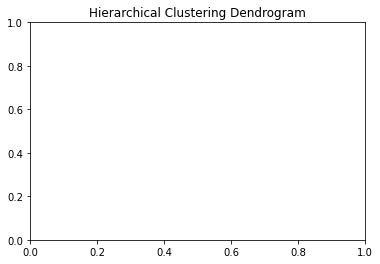

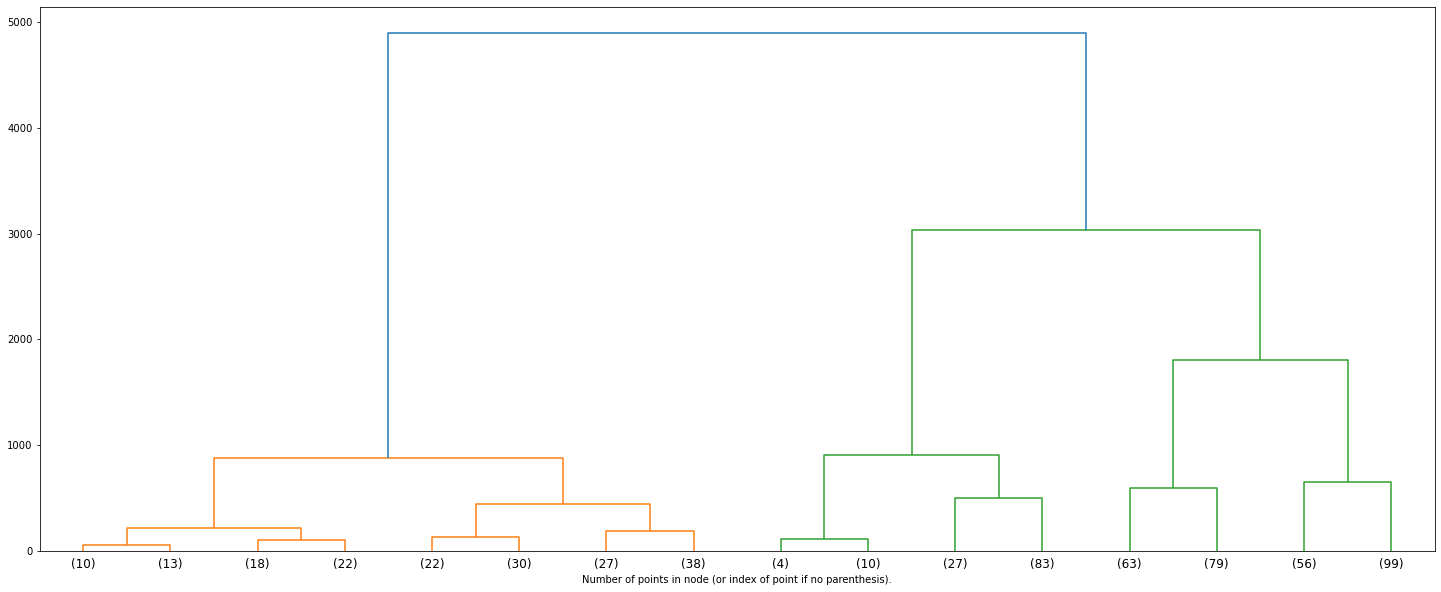

In [53]:
plt.title('Hierarchical Clustering Dendrogram')
plt.figure(figsize=(25, 10))

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Estudar funcionamento da função de distancia do model aglomerativo do SciKit Learn

Compreender como se dá a formação, atribuição e comparação dessa medida

In [27]:
# len(model.children_)# usar print
len(model.distances_)

600

Empilhar os elementos de cada conjunto em niveis distintos de uma estrutura de dados (árvore ou lista)

Retornar/mostrar esses elementos ao final da execução do dendograma 

Quem são os elementos do grupo 1, do grupo 2, ..., do grupo-n???